# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.


Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
#importacion librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# cargar datos de entrenamiento y evaluación

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?

  Observando el heatmap de correlacion entre variables, se observa una fuerte correlación entre las primeras 9 features.


- ¿Qué conclusiones puede extraer?

  Por tener muchas features correlacionadas, estas no estarían aportando información al modelo y pueden disminuir significativamente el accuracy

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
  
  Luego de reducir el conjunto de datos a 2 componentes principales se puede observar 2 conjuntos fácilmente separables con un clasificador no lineal.


- ¿Qué conclusiones puede extraer?

  El dataset inicial con una gran cantidad de variables correlacionadas indica la necesidad de reducir el espacio de features. A partir de un analisis de componentes principales se mejoró significativamente la posibilidad de separar el universo en análisis en 2 conjuntos usando un clasificador no lineal.


In [3]:

# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

def plot_correlacion(df): 
    df_corr = df.corr()
    plt.figure(figsize=(10,5))
    sns.heatmap(df_corr, cmap="YlGnBu")
    sns.set(font_scale=1,style='white')

    plt.title('Heatmap correlation')
    plt.show()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
0         400 non-null float64
1         400 non-null float64
2         400 non-null float64
3         400 non-null float64
4         400 non-null float64
5         400 non-null float64
6         400 non-null float64
7         400 non-null float64
8         400 non-null float64
9         400 non-null float64
10        400 non-null float64
11        400 non-null float64
12        400 non-null float64
13        400 non-null float64
14        400 non-null float64
15        400 non-null float64
16        400 non-null float64
TARGET    400 non-null float64
dtypes: float64(18)
memory usage: 56.3 KB


None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
0,-15.0,20.0,26.0,17.0,117.0,-1.099921,-0.366696,0.136307,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
1,35.0,87.0,-17.0,54.0,38.0,-0.507798,-0.774667,-0.879107,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,82.0,75.0,116.0,87.0,130.0,-0.219868,0.157875,0.386982,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,133.0,138.0,87.0,124.0,61.0,0.371992,-0.157556,-0.484258,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-17.0,23.0,17.0,16.0,109.0,-1.099966,-0.436268,0.028073,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


-1.0    201
 1.0    199
Name: TARGET, dtype: int64

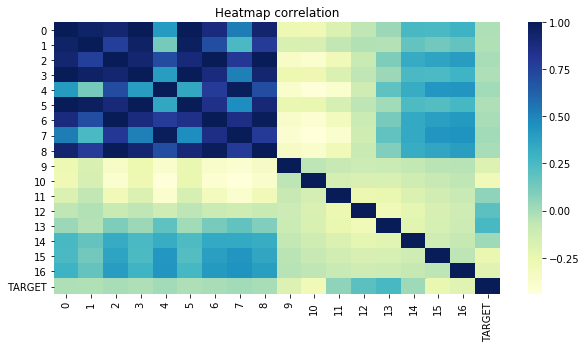

In [4]:
# Analisis inicial de dataset
display(train.describe())
display(train.info())
display(train.head())
display(Y_train.value_counts())
plot_correlacion(train)

In [5]:
# Separacion en componentes principales

pca = PCA(n_components=2)

pca_fit = pca.fit_transform(X_train)

# display(pca_fit)

pc_df = pd.DataFrame(data=pca_fit, columns=['PC_X', 'PC_Y'])
pc_df = pd.concat([pc_df, Y_train], axis=1)

display(pc_df.head())

,PC_X,PC_Y,TARGET
0,-169.452309,61.923209,-1.0
1,-140.637635,-63.051982,-1.0
2,-9.971975,48.867243,1.0
3,28.025112,-61.117568,-1.0
4,-176.649479,51.593234,-1.0


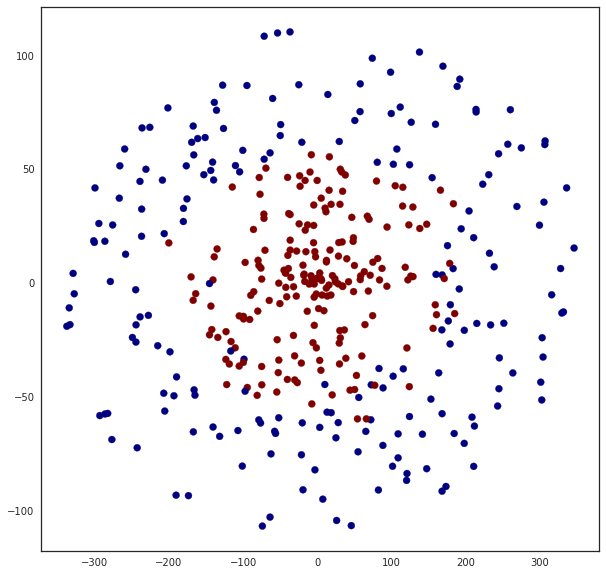

In [6]:
# Plot componentes principales

plt.figure(figsize=(10, 10))
plt.scatter(x=pc_df['PC_X'], y=pc_df['PC_Y'], c=pc_df['TARGET'], cmap='jet',)
plt.show()

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [7]:
clf = LinearSVC(random_state=0)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(Y_train, y_pred))

Accuracy in Train = 0.6125


**Preguntas:**
- ¿Cuál es la accuracy?

  Utilizando un clasificador lineal se obtiene un accuracy de 0.6125 (~61%)


- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

  El problema al intentar separar en 2 conjuntos de forma lineal es el sesgo de las features, ya que no aportan la información necesaria para la clasificación.   

Modifique la SVM para lograr una accuracy en train de 1.0.

Para mejorar el accuracy se optó por utilizar un clasificador no lineal

In [8]:
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))


Accuracy en train:	 1.0
Accuracy en test:	 0.7


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?

  Luego de modificar el modelo lineal por uno no lineal se obtiene un accuracy sobre daots de test de 0.7 (70%)

- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

  Luego de cambiar el modelo pasamos a tener un problema de varianza u overfitting, ya que el clasificador funciona perfectamente con datos de entrenamiento pero no logra la misma perfección frente a datos de test.

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

En este punto se optó por la utilización de grid search evaluando los parámetros C, tol, gamma. Luego de esta evaluación se encontró la mejor combinacion de parámetros con lo cuales se logra un accuracy de 0.9275 (~93%) en datos de entrenamiento y 0.89 (89%) en datos de test

In [9]:
%%time

# C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None

exploring_params = {
    'C':[0.6, 0.7, 0.75, 0.8, 0.85 ,0.9, 0.95],
    'tol': [ 1e-2,1e-1], 
    'gamma': [ 0.0003, 0.0004, 0.0005, 0.0007, 0.001,],
    'kernel' : [ 'rbf'],
}

clf = GridSearchCV(SVC(random_state=0), param_grid=exploring_params, cv=7, scoring = 'roc_auc')
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

print(clf.best_params_)

Accuracy en train:	 0.935
Accuracy en test:	 0.9
{'C': 0.9, 'gamma': 0.0004, 'kernel': 'rbf', 'tol': 0.1}
CPU times: user 16.8 s, sys: 203 ms, total: 17 s
Wall time: 17.5 s


## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [10]:
%%time
# Sin mejoras

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.
del train['PassengerId']  # eliminar ids
del train['Age']
del train['Cabin']
del train['Name']
del train['Sex']
del train['Embarked']
del train['Ticket']

display(train.info())
display(train.head())

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("Score sin mejoras: %.4f" % rf.oob_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


None

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


Score sin mejoras: 0.7172
CPU times: user 5.78 s, sys: 422 ms, total: 6.2 s
Wall time: 5.83 s


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?
Se analizó OOB Score para datos sin mejoras, aplicando cada mejora por separado y por último todas las mejoras simultaneamente. Individualemnte la mejora con mayor score fue el uso de la feature Sex codificandola numericamente, obteniendo 80% de efectividad vs el 71% obtenido sin aplicar ninguna mejora.
El mayor score se obtuvo mediante la palicación de todas las optimizaciones con un score de 82% 


In [11]:
%%time
# mejora completar datos age

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

# Borro cols no numericas
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Name']
del train['Sex']
del train['Embarked']
del train['Ticket']

display(train.info())

# completo Age 
train.Age=train.Age.fillna(train.Age.mean(),)

display(train.info())

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])

print("Score mejora completar age: %.4f" % rf.oob_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


None

Score mejora completar age: 0.7250
CPU times: user 5.83 s, sys: 375 ms, total: 6.2 s
Wall time: 5.86 s


In [12]:
%%time
# mejora nameLength
train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

# Borro cols no numericas
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Age']
del train['Sex']
del train['Embarked']
del train['Ticket']

display(train.info())

# reemplazo columna name por name length
train.Name=train.Name.fillna("")
train['Name'] = train['Name'].apply(len)

display(train.info())

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])

print("Score mejora nameLength: %.4f" % rf.oob_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


None

Score mejora nameLength: 0.7430
CPU times: user 5.58 s, sys: 406 ms, total: 5.98 s
Wall time: 5.87 s


In [13]:
def mapSex(sex):
    if(sex=='male'):
        return 1
    if(sex=='female'):
        return 2

In [14]:
%%time
# mejora sex numerico

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

# Borro cols no numericas
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Age']
del train['Name']
del train['Embarked']
del train['Ticket']

display(train.info())

# reemplazo columna Sex por codificacion numerica
train['Sex'] = train['Sex'].apply(mapSex)

display(train.info())

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])

print("Score mejora codificacion sexo: %.4f" % rf.oob_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


None

Score mejora codificacion sexo: 0.8025
CPU times: user 5.67 s, sys: 359 ms, total: 6.03 s
Wall time: 5.58 s


In [15]:
%%time

# todas las mejoras

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

# Borro cols no numericas
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Embarked']
del train['Ticket']

display(train.info())

# aplico las 3 mejoras

train.Age=train.Age.fillna(train.Age.mean(),)

train.Name=train.Name.fillna("")
train['Name'] = train['Name'].apply(len)

train['Sex'] = train['Sex'].apply(mapSex)

display(train.info())

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])

print("Score todas las mejoras: %.4f" % rf.oob_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


None

Score todas las mejoras: 0.8227
CPU times: user 5.81 s, sys: 297 ms, total: 6.11 s
Wall time: 5.63 s
